In [1]:
#importing all the libraries
from numpy import genfromtxt
import numpy as np
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle
from sklearn import cross_validation
from sklearn.svm import SVC


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Loading the data trimming it
dataset=genfromtxt('data.csv',delimiter=',')

In [3]:
#Feature set
X = dataset[:,0:12]
#Label set
Y = dataset[:,13]

In [4]:
#Doing binary classification i.e. data with value 0 is 0 and rest is 1

for index, item in enumerate(Y):
    if not(item==0.0):
        Y[index]=1
print(Y)
target_names=['0','1']

[0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1.]


In [5]:
#plotting the graph

def plot_2d(data,target,target_names):
    colors = cycle('rgbcmykw')
    target_ids=range(len(target_names))
    plt.figure()
    for i,c, label in zip(target_ids,colors,target_names):
        plt.scatter(data[target==i,0],data[target==i,1],c=c,label=label)
    plt.legend()
    plt.savefig('graph')

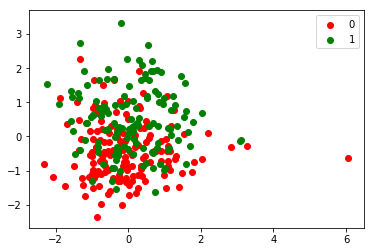

In [6]:
#Classifying the data using linear SVM and predicting the probablities of disease belonging to a particular class
#Showing the graph defined by plot_2d 
modelSVM = LinearSVC(C=0.1)
pca = PCA(n_components=2, whiten=True).fit(X)
X_new = pca.transform(X)
plot_2d(X_new , Y , target_names)

In [7]:
#Cross Validation on Trainig and Test set for validating Linear SVM model
X_train,X_test,Y_train,Y_test = cross_validation.train_test_split(X_new,Y,test_size=0.2,train_size=0.8,random_state=0)
modelSVM=modelSVM.fit(X_train,Y_train)
print("Linear SVC values with split :")
print(modelSVM.score(X_test,Y_test))

modelSVMRaw = LinearSVC(C=0.1)
modelSVMRaw = modelSVMRaw.fit(X_new,Y)
cnt=0
for i in modelSVMRaw.predict(X_new):
    if(i == Y[1]):
        cnt= cnt+1
# print("Linear SVC score without split :")
# print(float(cnt)/101)


Linear SVC values with split :
0.6166666666666667


In [8]:
#Applying PCA on data features
modelSVM2= SVC(C=0.1,kernel='rbf')
X_train1,X_test1,Y_train1,Y_test1=cross_validation.train_test_split(X_new,Y,test_size=0.2,train_size=0.8,random_state=0)
modelSVM2=modelSVM2.fit(X_train1,Y_train1)
print("RBF score with split :")
print(modelSVM2.score(X_test1,Y_test1))


RBF score with split :
0.6


In [9]:
modelSVMRaw2 = SVC(C=0.1,kernel='rbf')
modelSVMRaw2 =modelSVMRaw2.fit(X_new,Y)
cnt1=0
for i in modelSVMRaw2.predict(X_new):
    if i==Y[1]:
        cnt1=cnt1+1
print("RBF score without split :")
print(float(cnt1)/298)

RBF score without split :
0.3959731543624161


In [10]:
#Mest plots creation
X_min,X_max=X_new[:,0].min()-1,X_new[:,0].max()+1
Y_min,Y_max=X_new[:,1].min()-1,X_new[:,1].max()+1
xx,yy=np.meshgrid(np.arange(X_min,X_max,0.2),np.arange(Y_min,Y_max,0.2))


In [11]:
titles="SVC ( RBF Kernel) -- Plotting highest varied 2 PCA values"

In [12]:
#Ploting decision boundary with different color to a point in mesh

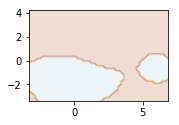

In [13]:
plt.subplot(2,2,i+1)
plt.subplots_adjust(wspace=0.4,hspace=0.4)
Z=modelSVM2.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.Paired,alpha=0.2)

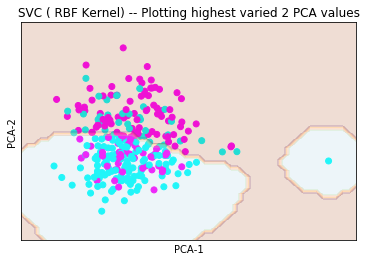

In [17]:
x=[-3,4]
y=[-2,6]
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.scatter(X_new[:,0], X_new[:,1], c=Y, cmap = "cool")
xx,yy=np.meshgrid(np.arange(X_min,X_max,0.2),np.arange(Y_min,Y_max,0.2))
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks(())
plt.yticks(())
plt.title(titles)
plt.contourf(xx,yy,Z,cmap=plt.cm.Paired,alpha=0.2)

plt.show()